# Data Dictionary

***Species***: This column represents the species of the fish. It is a categorical variable that categorizes each fish into one of seven species. The species may include names like: 
+ "Perch" 
+ "Bream" 
+ "Roach"
+ "Pike" 
+ "Smelt" 
+ "Parkki"
+ "Whitefish" 

***Weight***: This column represents the weight of the fish. It is a numerical variable that is typically measured in grams. The weight is the dependent variable we want to predict using polynomial regression. This column is the target variable for the polynomial regression analysis, where we aim to predict the fish's weight based on its other attributes.

***Length1***: This column represents the first measurement of the fish's length. It is a numerical variable, typically measured in centimetres.

***Length2***: This column represents the second measurement of the fish's length. It is another numerical variable, typically measured in centimetres.

***Length3***: This column represents the third measurement of the fish's length. Similar to the previous two columns, it is a numerical variable, usually measured in centimetres.

***Height***: This column represents the height of the fish. It is a numerical variable, typically measured in centimetres.

***Width***: This column represents the width of the fish. Like the other numerical variables, it is also typically measured in centimetres.

In [34]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
import statsmodels.formula.api as sfs
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut, cross_val_score
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Data Preprocessing

In [2]:
df = pd.read_csv(r"C:\Users\X1 Carbon\Downloads\Fish[1].csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.shape

(159, 7)

In [4]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [6]:
df["temp"] = df["Species"]
df = pd.get_dummies(data=df, columns=["temp"], dtype=int, prefix="Species", prefix_sep="_")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


# Exploratory Data Analysis

***Length***:
+ There is a positive non-linear relationship between ***Length*** and ***Weight***
+ Std of ***Length*** is significant compared to other features (consider log transformation)
+ ***Weight*** increase per unit increase in ***Average_Length*** is different between ***Species*** (consider interaction term)

***Height***:
+ There is a positive non-linear relationship between ***Height*** and ***Weight***
+ ***Weight*** increase per unit increase in ***Height*** is different between ***Species*** (consider interaction term)

***Width***:
+ There is a positive non-linear relationship between ***Width*** and ***Weight***
+ ***Weight*** increase per unit increase in ***Width*** is different between ***Species*** (consider interaction term)

***Species***:
+ The average ***Weight*** between different ***Species*** is significant

In [7]:
include_col = []

for col_name in df.columns:
    if not("Species" in col_name):
        include_col.append(col_name)

df[include_col].describe()


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
def draw_hist_plot(col_name: str):
    sns.histplot(data=df, x=col_name, kde=True)

def draw_box_plot(col_name: str):
    sns.boxplot(data=df, x=col_name)

def draw_scatter_plot(col_name: str, hue=None):
    sns.scatterplot(data=df, x=col_name, y="Weight", hue=hue)

### Length1

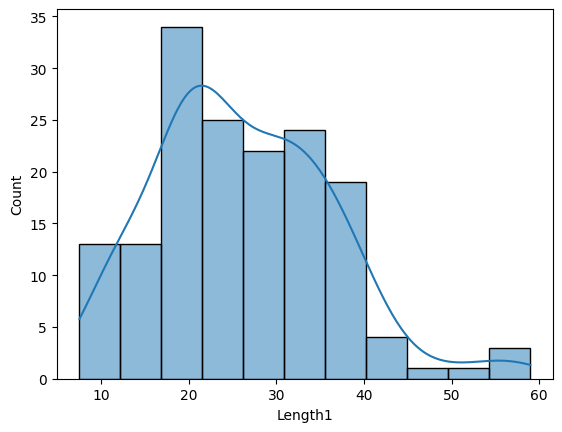

In [70]:
draw_hist_plot(col_name="Length1")

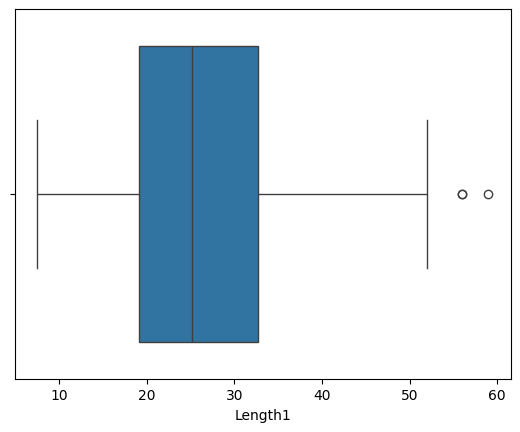

In [71]:
draw_box_plot(col_name="Length1")

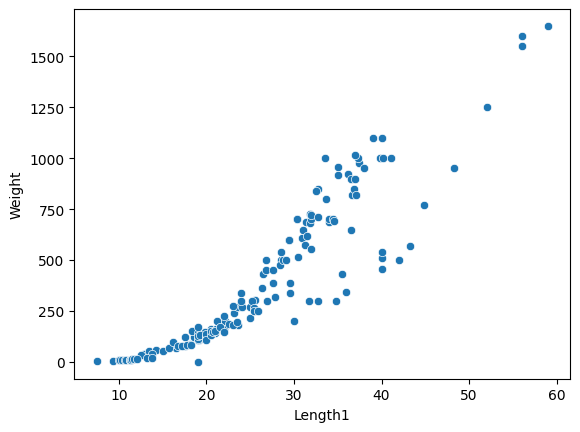

In [72]:
draw_scatter_plot(col_name="Length1")

### Length2

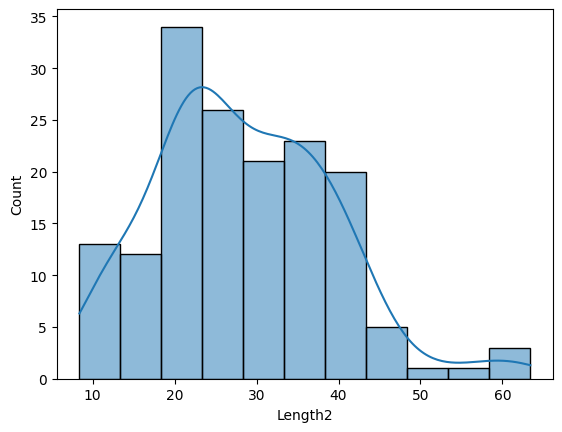

In [73]:
draw_hist_plot(col_name="Length2")

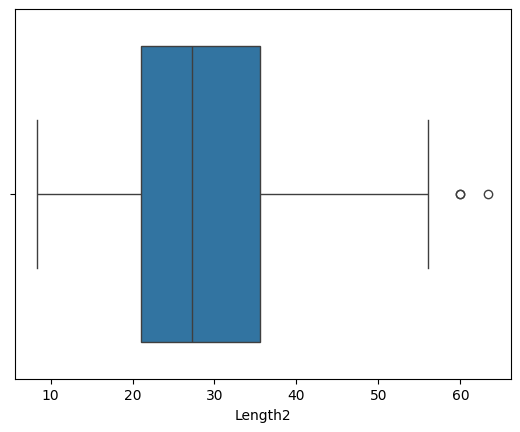

In [74]:
draw_box_plot(col_name="Length2")

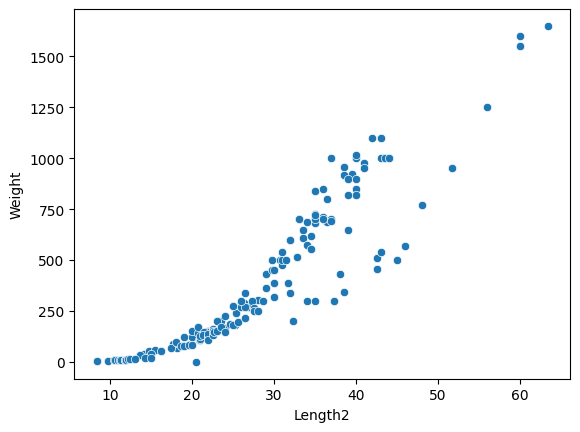

In [75]:
draw_scatter_plot(col_name="Length2")

### Length3

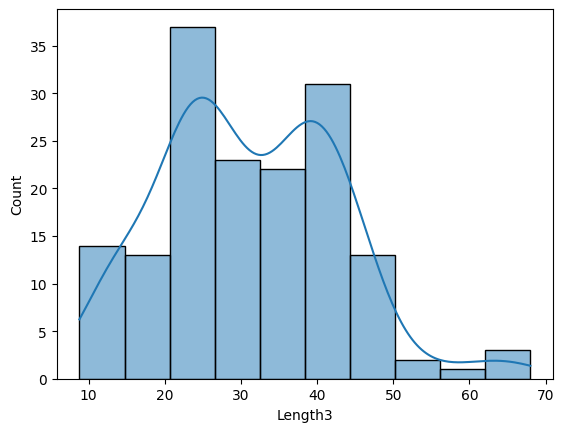

In [76]:
draw_hist_plot(col_name="Length3")

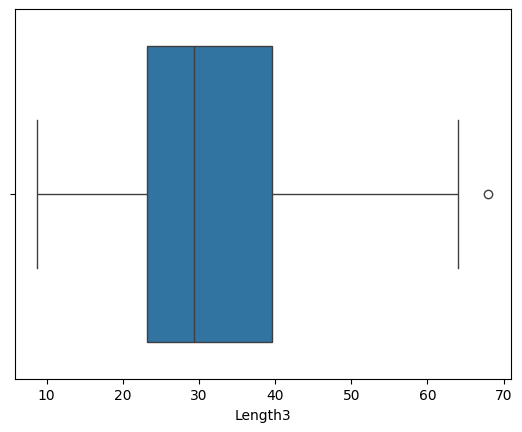

In [77]:
draw_box_plot(col_name="Length3")

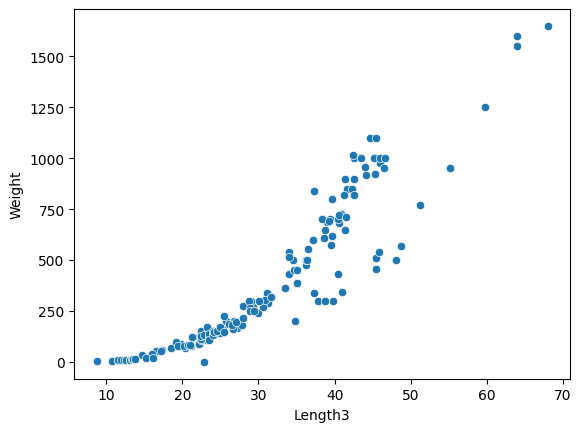

In [78]:
draw_scatter_plot(col_name="Length3")

### Height

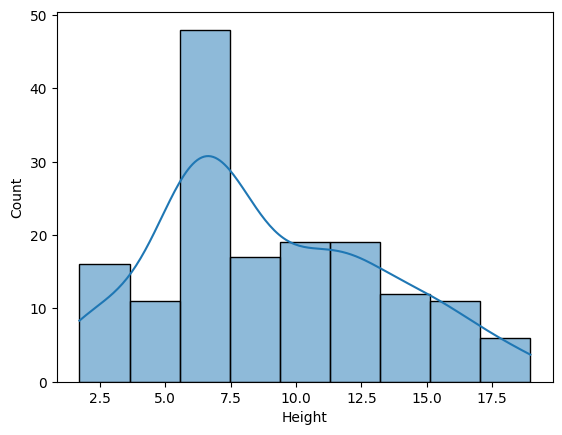

In [79]:
draw_hist_plot(col_name="Height")

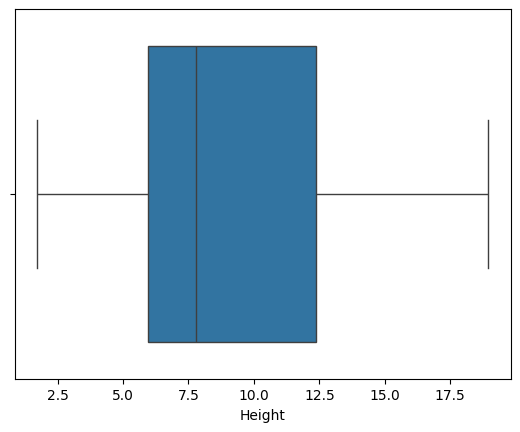

In [80]:
draw_box_plot(col_name="Height")

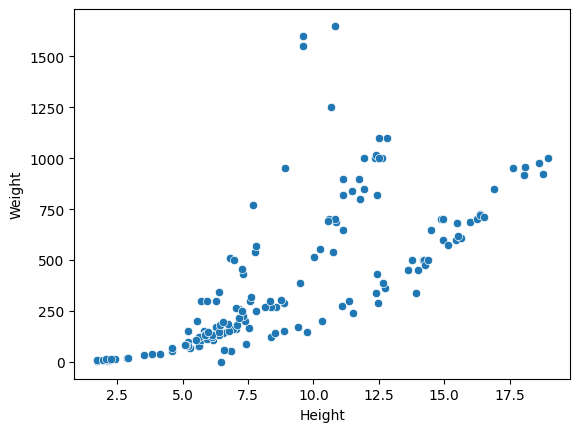

In [81]:
draw_scatter_plot(col_name="Height")

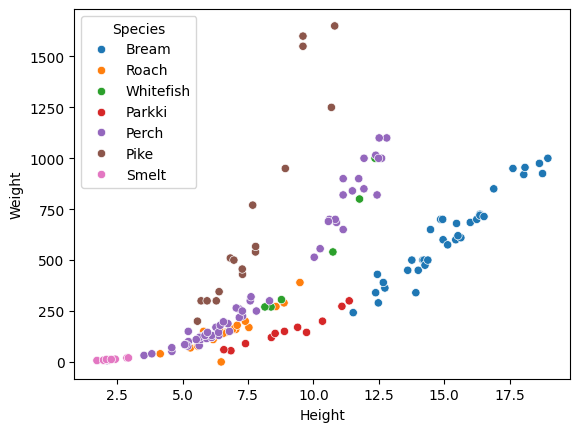

In [82]:
draw_scatter_plot(col_name="Height", hue="Species")

### Width

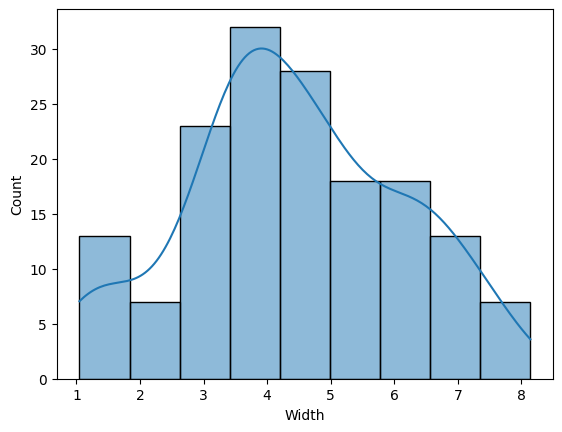

In [83]:
draw_hist_plot(col_name="Width")

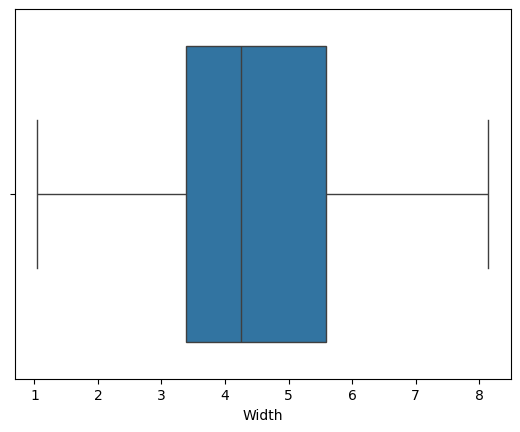

In [84]:
draw_box_plot(col_name="Width")

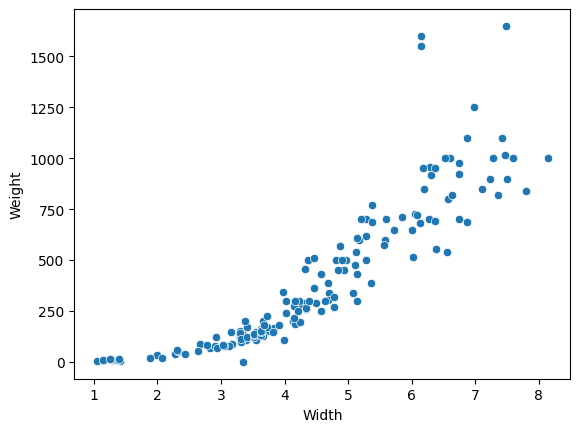

In [85]:
draw_scatter_plot(col_name="Width")

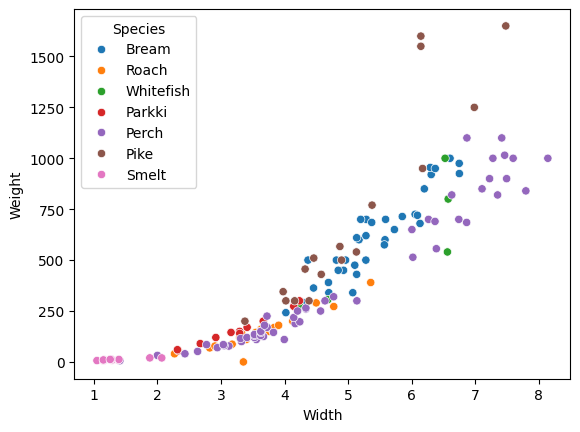

In [86]:
draw_scatter_plot(col_name="Width", hue="Species")

### Species

<Axes: xlabel='Species', ylabel='Average_Weight'>

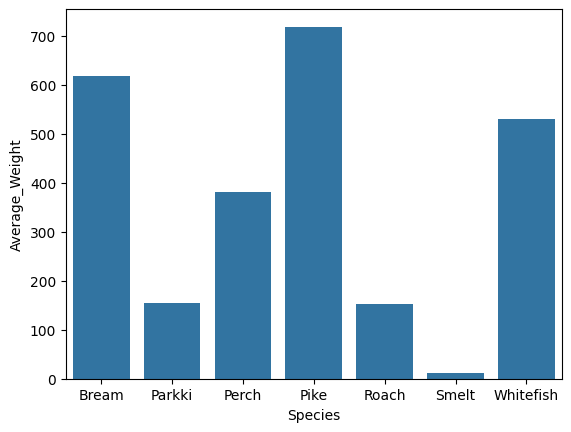

In [93]:
species_group = df.groupby(by="Species").agg({"Weight" : "mean"}).reset_index()
species_group.rename(columns={"Weight" : "Average_Weight"}, inplace=True)
sns.barplot(data=species_group, x="Species", y="Average_Weight")

### Average_Length

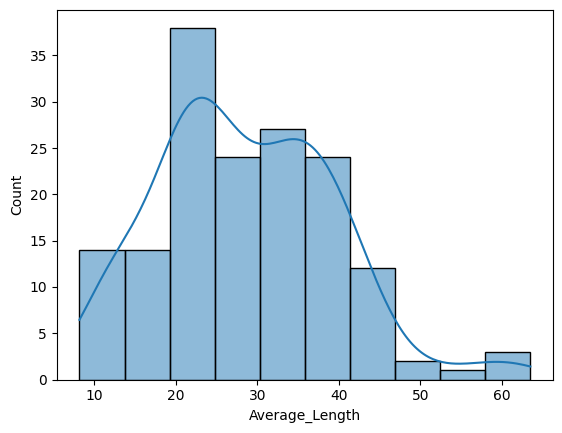

In [14]:
draw_hist_plot(col_name="Average_Length")

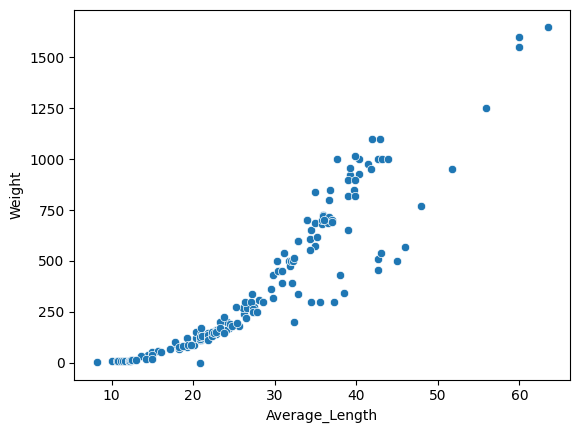

In [15]:
draw_scatter_plot(col_name="Average_Length")

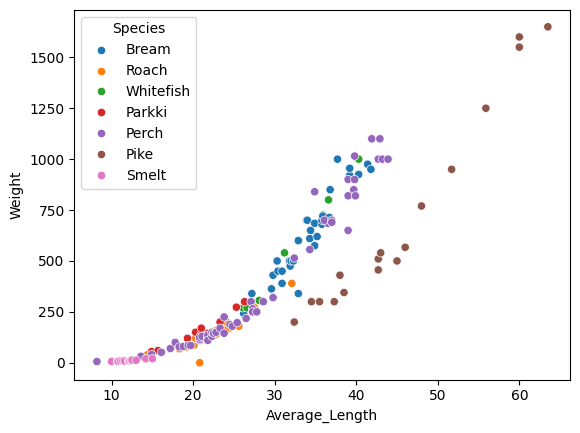

In [16]:
draw_scatter_plot(col_name="Average_Length", hue="Species")

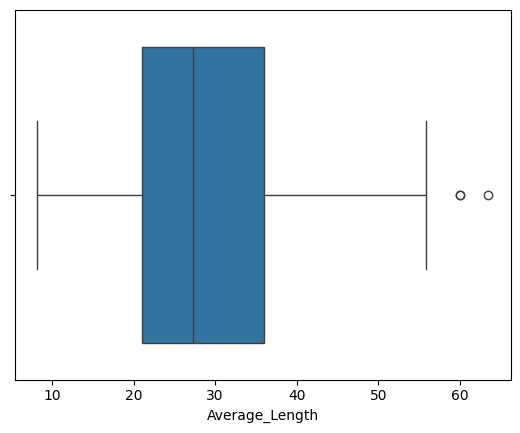

In [17]:
draw_box_plot(col_name="Average_Length")

### Width_Sqrd

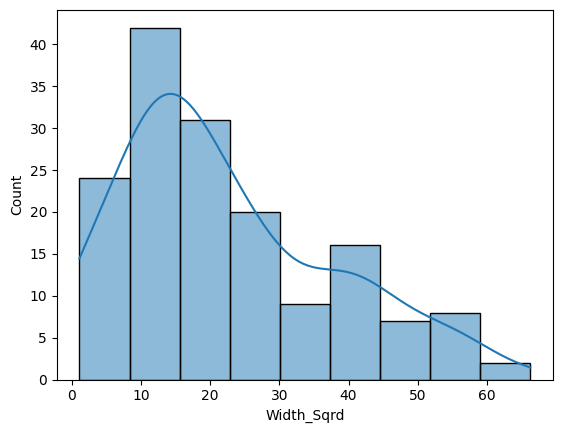

In [20]:
draw_hist_plot(col_name="Width_Sqrd")

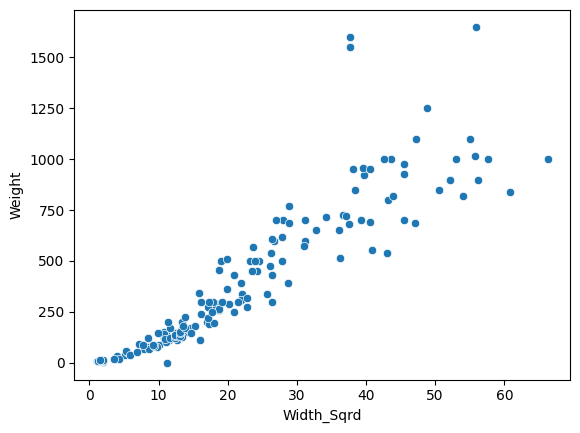

In [21]:
draw_scatter_plot(col_name="Width_Sqrd")

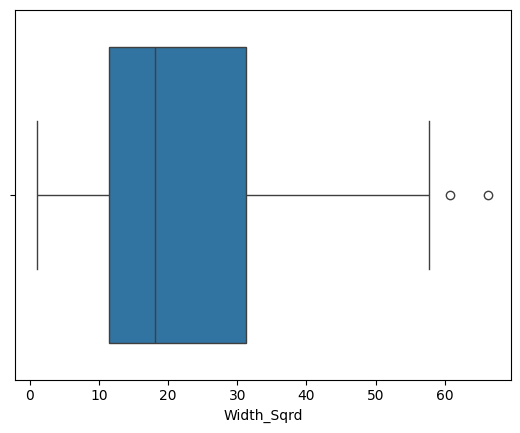

In [22]:
draw_box_plot(col_name="Width_Sqrd")

### Exp_Width

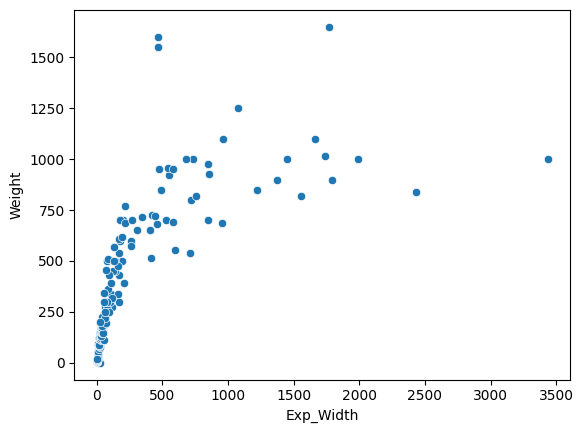

In [25]:
draw_scatter_plot(col_name="Exp_Width")

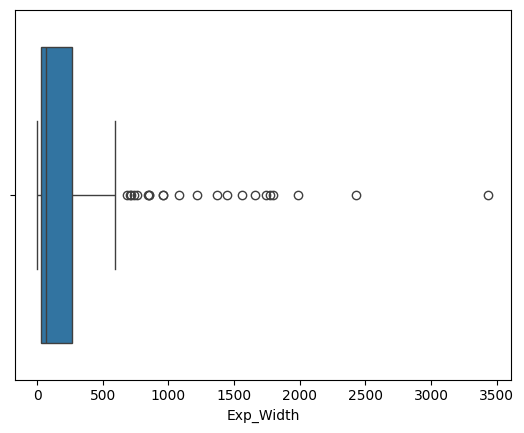

In [26]:
draw_box_plot(col_name="Exp_Width")

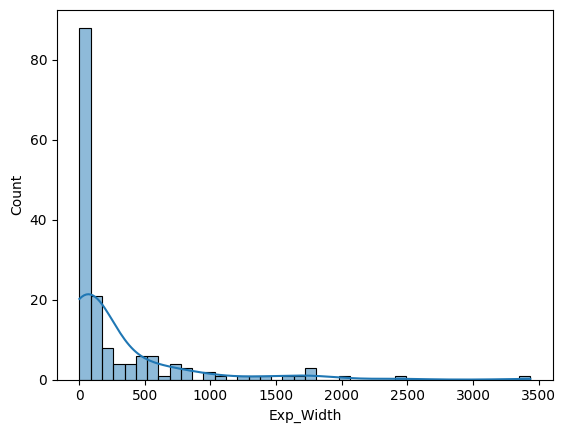

In [27]:
draw_hist_plot(col_name="Exp_Width")

### Weight_Sqrt

<Axes: xlabel='Width', ylabel='Weight_Sqrt'>

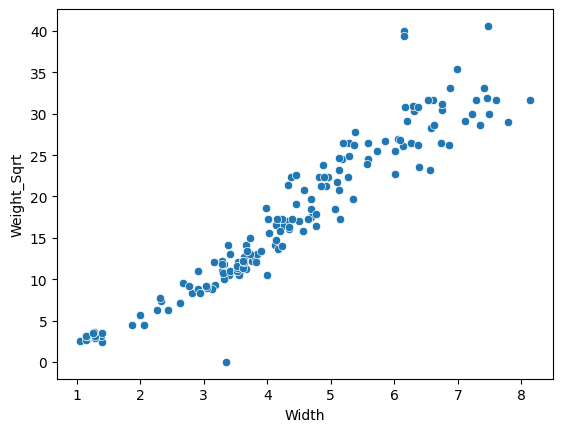

In [31]:
sns.scatterplot(data=df, x="Width", y="Weight_Sqrt")

<Axes: xlabel='Height', ylabel='Weight_Sqrt'>

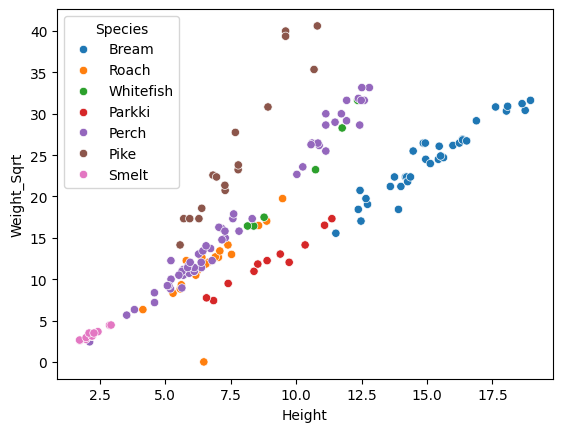

In [39]:
sns.scatterplot(data=df, x="Height", y="Weight_Sqrt", hue="Species")

<Axes: xlabel='Average_Length', ylabel='Weight_Sqrt'>

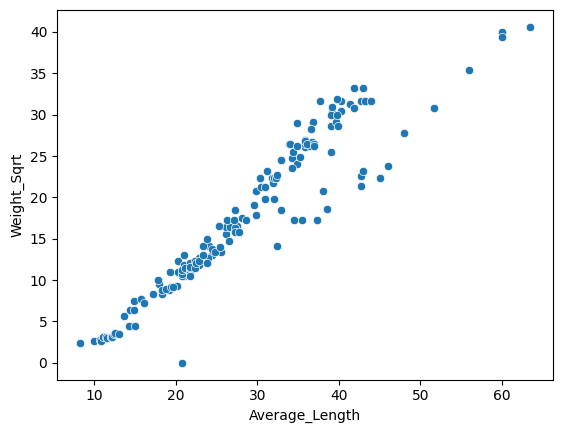

In [43]:
sns.scatterplot(data=df, x="Average_Length", y="Weight_Sqrt")

### Height_Sqrd

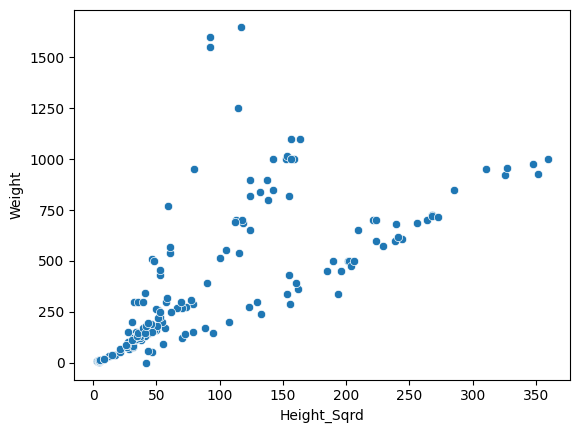

In [35]:
draw_scatter_plot(col_name="Height_Sqrd")

<Axes: xlabel='Height_Sqrd', ylabel='Weight_Sqrt'>

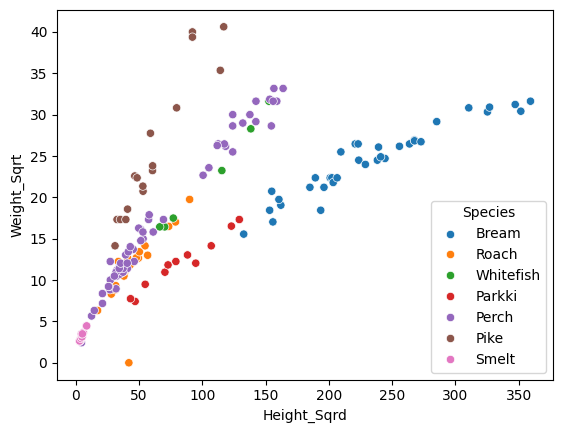

In [38]:
sns.scatterplot(data=df, x="Height_Sqrd", y="Weight_Sqrt", hue="Species")

### Average_Length_Sqrd

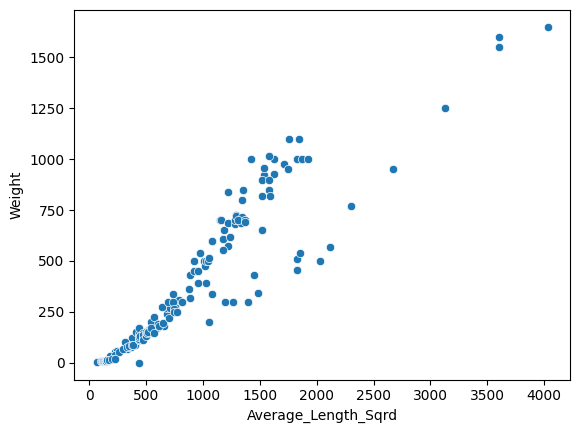

In [42]:
draw_scatter_plot(col_name="Average_Length_Sqrd")

<Axes: xlabel='Average_Length_Sqrd', ylabel='Weight_Sqrt'>

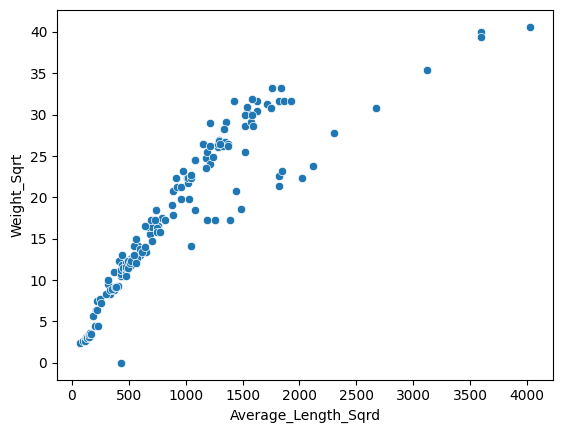

In [44]:
sns.scatterplot(data=df, x="Average_Length_Sqrd", y="Weight_Sqrt")

# Feature Engineering

In [8]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [9]:
df["Average_Length"] = round((df["Length1"] + df["Length2"] + df["Length3"])/3, 1)
df["Width_Sqrd"] = df["Width"] ** 2
df["Exp_Width"] = np.exp(df["Width"])
df["Weight_Sqrt"] = df["Weight"] ** 0.5
df["Height_Sqrd"] = df["Height"] ** 2
df["Average_Length_Sqrd"] = df["Average_Length"] ** 2

In [10]:
df_numeric = df[[col for col in df.select_dtypes(include=[float, int]).columns if "Species" not in col]]
df_numeric.corr(method="pearson")

,Weight,Length1,Length2,Length3,Height,Width,Average_Length,Width_Sqrd,Exp_Width,Weight_Sqrt,Height_Sqrd,Average_Length_Sqrd
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507,0.920795,0.909665,0.718509,0.965840,0.679762,0.923001
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050,0.998628,0.835214,0.589740,0.937446,0.533104,0.975182
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547,0.999360,0.839335,0.589276,0.942553,0.548747,0.973330
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520,0.997202,0.837635,0.565506,0.954122,0.618901,0.962767
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881,0.659321,0.739312,0.437155,0.807993,0.972436,0.543305
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,0.874655,0.974896,0.746017,0.948382,0.695692,0.783917
Average_Length,0.920795,0.998628,0.999360,0.997202,0.659321,0.874655,1.000000,0.838752,0.581686,0.946625,0.569861,0.971716
Width_Sqrd,0.909665,0.835214,0.839335,0.837635,0.739312,0.974896,0.838752,1.000000,0.852426,0.927467,0.668612,0.779140
Exp_Width,0.718509,0.589740,0.589276,0.565506,0.437155,0.746017,0.581686,0.852426,1.000000,0.667961,0.394599,0.578709
Weight_Sqrt,0.965840,0.937446,0.942553,0.954122,0.807993,0.948382,0.946625,0.927467,0.667961,1.000000,0.733207,0.894432


<Axes: >

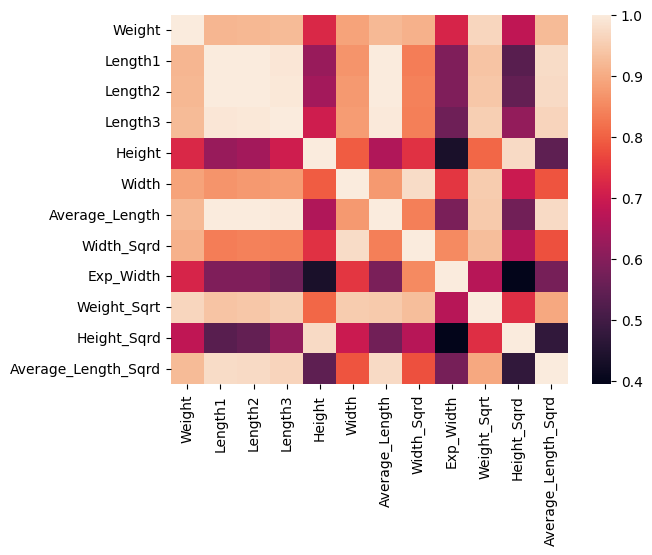

In [11]:
sns.heatmap(df_numeric.corr())

# Model Building

### Linear Regression

In [12]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Average_Length,Width_Sqrd,Exp_Width,Weight_Sqrt,Height_Sqrd,Average_Length_Sqrd
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0,26.2,16.160400,55.701106,15.556349,132.710400,686.44
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0,27.2,18.538191,74.113670,17.029386,155.750400,739.84
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0,27.2,22.053355,109.519214,18.439089,153.209933,739.84
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0,29.6,19.851480,86.099190,19.052559,162.052900,876.16
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0,29.8,26.357956,169.694540,20.736441,154.853136,888.04


In [13]:
model_full = sfs.ols(formula="Weight_Sqrt ~ Average_Length + C(Species)", data=df).fit()
model_reduced = sfs.ols(formula="Weight_Sqrt ~ Average_Length", data=df).fit()

In [14]:
anova_results = anova_lm(model_reduced, model_full) # Partial F test concludes that feature "Species" is significant overall but interaction term is not significant
anova_results

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,157.0,1395.034153,0.0,NaN,NaN,NaN
1,151.0,340.147004,6.0,1054.887149,78.048588,9.068031e-44


In [15]:
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Weight_Sqrt   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     829.9
Date:                Mon, 04 Aug 2025   Prob (F-statistic):          4.47e-117
Time:                        14:05:47   Log-Likelihood:                -286.07
No. Observations:                 159   AIC:                             588.1
Df Residuals:                     151   BIC:                             612.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -7.5985      0.656    -11.583      0.000      -8.895      -6.302
C(Species)[T.Parkki]        0.1607      0.570      0.282      0.779      -0.966       1.288
C(Species)[T.Perch]        -1.1066      0.342     -3.238      0.001      -1.782      -0.431
C(Species)[T.Pike]        -10.0620      0.490    -20.538      0.000     -11.030      -9.094
C(Species)[T.Roach]        -2.1639      0.466     -4.640      0.000      -3.085      -1.243
C(Species)[T.Smelt]        -0.5319      0.614     -0.866      0.388      -1.745       0.681
C(Species)[T.Whitefish]     0.0638      0.665      0.096      0.924      -1.249       1.377
Average_Length              0.9461      0.018     53.050      0.000       0.911       0.981
==============================================================================
Omnibus:                       93.549   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1207.496
Skew:                          -1.786   Prob(JB):                    6.25e-263
Kurtosis:                      16.019   Cond. No.                         261.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
df_col_included = df[["Height", "Width", "Average_Length"]] # Remove Width and Height due to high VIF
vif_data = pd.DataFrame({"Feature" : df_col_included.columns,
                         "VIF" : [variance_inflation_factor(df_col_included.values, i) for i in range(df_col_included.shape[1])]})
vif_data

,Feature,VIF
0,Height,14.739331
1,Width,50.858849
2,Average_Length,32.591922


In [17]:
RMSE = np.sqrt(np.mean(model_full.resid ** 2))
RMSE # For Weight_Sqrt

np.float64(1.4626309631882468)

In [18]:
# Check for assumption of independence and constant variance
temp = pd.DataFrame({"Observed_Weight" : df["Weight"],
                     "Predicted_Weight" : model_full.predict(df) ** 2,
                     "Error_Weight" : df["Weight"] - model_full.predict(df) ** 2,
                     "Observed_Weight_Sqrt" : df["Weight_Sqrt"],
                     "Predicted_Weight_Sqrt" : model_full.predict(df),
                     "Error_Weight_Sqrt" : df["Weight_Sqrt"] - model_full.predict(df)})
temp.head(20)

,Observed_Weight,Predicted_Weight,Error_Weight,Observed_Weight_Sqrt,Predicted_Weight_Sqrt,Error_Weight_Sqrt
0,242.0,295.430124,-53.430124,15.556349,17.188081,-1.631732
1,290.0,328.846848,-38.846848,17.029386,18.134135,-1.104749
2,340.0,328.846848,11.153152,18.439089,18.134135,0.304954
3,363.0,416.350337,-53.350337,19.052559,20.404665,-1.352106
4,430.0,424.107703,5.892297,20.736441,20.593875,0.142566
5,450.0,447.809413,2.190587,21.213203,21.161508,0.051696
6,500.0,443.814377,56.185623,22.360680,21.066902,1.293777
7,390.0,468.053097,-78.053097,19.748418,21.634535,-1.886117
8,450.0,468.053097,-18.053097,21.213203,21.634535,-0.421331
9,500.0,505.619452,-5.619452,22.360680,22.485983,-0.125304


In [19]:
RMSE = np.sqrt(np.mean(temp["Error_Weight"] ** 2))
RMSE # For Weight

np.float64(55.1127999300847)

In [20]:
model_full = sfs.ols(formula="Weight ~ Average_Length_Sqrd + Width_Sqrd * C(Species)", data=df).fit()
model_reduced = sfs.ols(formula="Weight ~ Average_Length_Sqrd + Width_Sqrd + C(Species)", data=df).fit()

In [21]:
anova_results = anova_lm(model_reduced, model_full) # Partial F test concludes that feature "Species" and interaction term is significant overall
anova_results

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,150.0,495485.767730,0.0,NaN,NaN,NaN
1,144.0,419262.962928,6.0,76222.804803,4.363246,0.000444


In [22]:
model_full.summary() # Error message [2] is due to multicollinearity or because features on different scale (which is the case in this situation)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     486.4
Date:                Mon, 04 Aug 2025   Prob (F-statistic):          1.31e-113
Time:                        14:05:47   Log-Likelihood:                -851.86
No. Observations:                 159   AIC:                             1734.
Df Residuals:                     144   BIC:                             1780.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                           -234.2403     36.813     -6.363      0.000    -307.004    -161.476
C(Species)[T.Parkki]                 157.4697     59.157      2.662      0.009      40.542     274.397
C(Species)[T.Perch]                   75.8199     38.357      1.977      0.050       0.005     151.634
C(Species)[T.Pike]                  -172.4322     48.350     -3.566      0.000    -268.000     -76.864
C(Species)[T.Roach]                  126.0542     50.026      2.520      0.013      27.174     224.934
C(Species)[T.Smelt]                  194.1881     49.975      3.886      0.000      95.408     292.968
C(Species)[T.Whitefish]               -5.1706     71.602     -0.072      0.943    -146.697     136.356
Average_Length_Sqrd                    0.4843      0.028     17.048      0.000       0.428       0.540
Width_Sqrd                             9.6017      1.456      6.595      0.000       6.724      12.479
Width_Sqrd:C(Species)[T.Parkki]       -7.7383      4.223     -1.832      0.069     -16.086       0.609
Width_Sqrd:C(Species)[T.Perch]        -4.5498      1.235     -3.683      0.000      -6.991      -2.108
Width_Sqrd:C(Species)[T.Pike]         -6.7453      1.931     -3.493      0.001     -10.562      -2.928
Width_Sqrd:C(Species)[T.Roach]        -9.1912      2.598     -3.537      0.001     -14.327      -4.055
Width_Sqrd:C(Species)[T.Smelt]       -20.4133     16.622     -1.228      0.221     -53.269      12.442
Width_Sqrd:C(Species)[T.Whitefish]    -0.7132      2.198     -0.325      0.746      -5.057       3.631
==============================================================================
Omnibus:                       13.133   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               33.198
Skew:                           0.202   Prob(JB):                     6.18e-08
Kurtosis:                       5.202   Cond. No.                     2.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
df_col_included = df[["Width_Sqrd", "Average_Length_Sqrd"]] # Remove Width and Height due to high VIF
vif_data = pd.DataFrame({"Feature" : df_col_included.columns,
                         "VIF" : [variance_inflation_factor(df_col_included.values, i) for i in range(df_col_included.shape[1])]})
vif_data

,Feature,VIF
0,Width_Sqrd,6.954838
1,Average_Length_Sqrd,6.954838


In [39]:
# Check for assumption of independence and constant variance
prediction_df = pd.DataFrame({"Observed_Weight" : df["Weight"],
                     "Predicted_Weight" : model_full.predict(df),
                     "Error" : df["Weight"] - model_full.predict(df)})
prediction_df.head(20)

,Observed_Weight,Predicted_Weight,Error
0,242.0,253.354268,-11.354268
1,290.0,302.045496,-12.045496
2,340.0,335.797007,4.202993
3,363.0,380.671984,-17.671984
4,430.0,448.898359,-18.898359
5,450.0,446.431569,3.568431
6,500.0,477.897657,22.102343
7,390.0,439.352375,-49.352375
8,450.0,453.431318,-3.431318
9,500.0,491.640206,8.359794


In [25]:
RMSE = np.sqrt(np.mean(temp["Error"] ** 2))
RMSE # For Weight

np.float64(51.350501269974025)

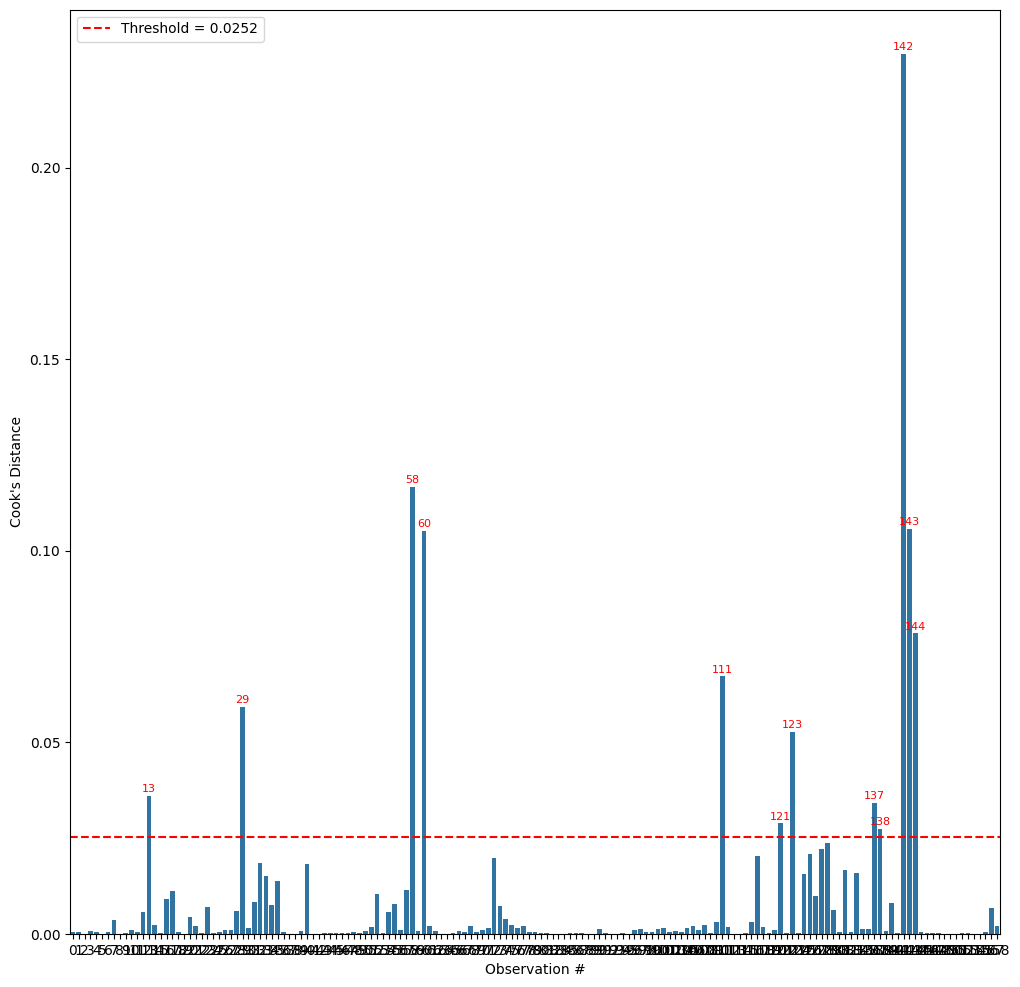

In [26]:
# Check for influential points
influences = model_full.get_influence()
cooks_d, p_value = influences.cooks_distance
cooks_df = pd.DataFrame({"Observation #" : range(len(cooks_d)),
                         "Cook's Distance" : cooks_d})
plt.subplots(figsize=(12, 12))
ax = sns.barplot(data=cooks_df, x="Observation #", y="Cook's Distance")
threshold = 4 / len(df)
plt.axhline(threshold, color='red', linestyle='--', label=f'Threshold = {threshold:.4f}')
plt.legend(loc="upper left")

for i, val in enumerate(cooks_df["Cook's Distance"]):
    if val > threshold:  # Label only influential points
        ax.text(i, val + 0.001, str(i), color='red', ha='center', fontsize=8)

In [27]:
df.loc[df.index == 142]

,Species,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Average_Length,Width_Sqrd,Exp_Width,Weight_Sqrt,Height_Sqrd,Average_Length_Sqrd
142,Pike,1600.0,56.0,60.0,64.0,9.6,6.144,0,0,0,1,0,0,0,60.0,37.748736,465.913503,40.0,92.16,3600.0


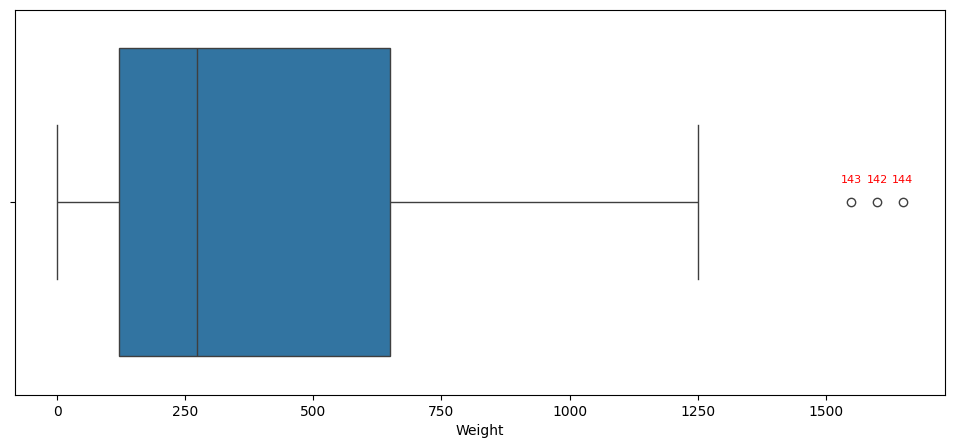

In [28]:
plt.figure(figsize=(12,5))
ax = sns.boxplot(data=df, x="Weight")
IQR = df["Weight"].quantile(0.75) - df["Weight"].quantile(0.25)
for index, weight in enumerate(df["Weight"]):
    if weight > df["Weight"].quantile(0.75) + 1.5 * IQR:
        ax.text(weight, -0.05, str(index), color='red', ha='center', fontsize=8)

+ Reason for why observation #142 influences the regression model so much is potentially due to its weight being an outlier

Text(0.5, 1.0, 'Goodness of fit')

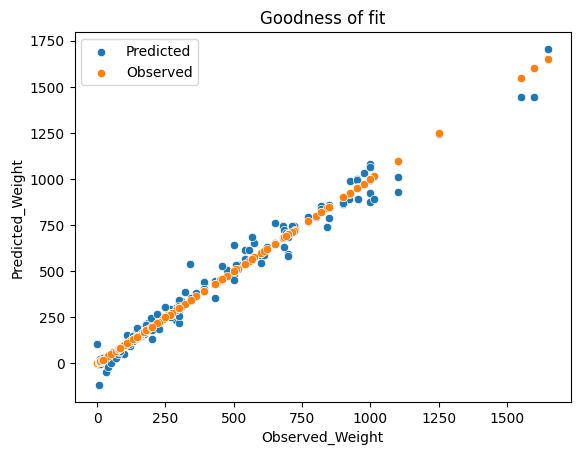

In [58]:
#Check the quality of linear fit
sns.scatterplot(data=prediction_df, x=prediction_df["Observed_Weight"], y=prediction_df["Predicted_Weight"])
sns.scatterplot(data=prediction_df, x=prediction_df["Observed_Weight"], y=prediction_df["Observed_Weight"])
plt.legend(["Predicted", "Observed"])
plt.title("Goodness of fit")

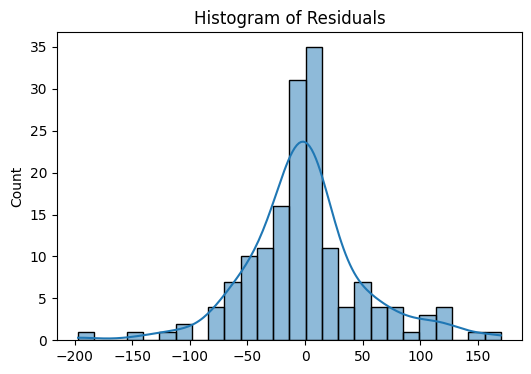

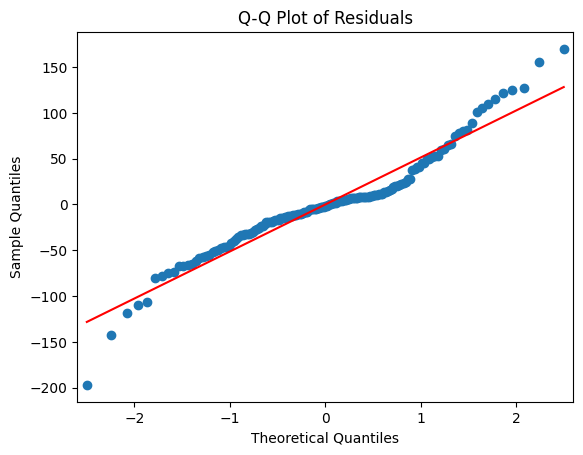

In [ ]:
#Check for normality assumption
residuals = model_full.resid

# Residual histogram
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

Text(0.5, 1.0, 'Residuals vs Fitted')

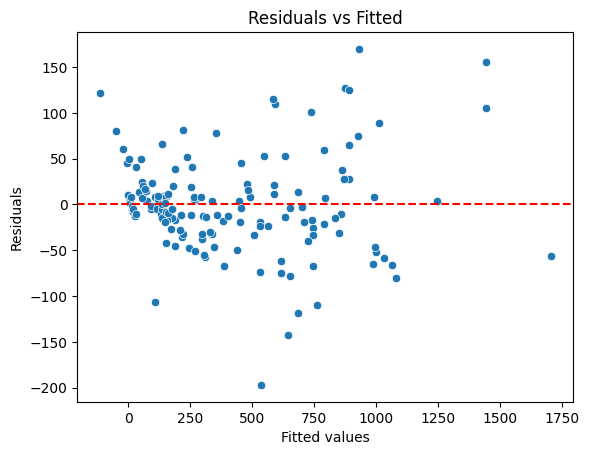

In [57]:
#Check for constant variance and independent assumptions
sns.scatterplot(x=model_full.fittedvalues, y=model_full.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")

###

In [13]:
df.head()

,Weight,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,Average_Length
0,242.0,11.5200,4.0200,1,0,0,0,0,0,0,26.2
1,290.0,12.4800,4.3056,1,0,0,0,0,0,0,27.2
2,340.0,12.3778,4.6961,1,0,0,0,0,0,0,27.2
3,363.0,12.7300,4.4555,1,0,0,0,0,0,0,29.6
4,430.0,12.4440,5.1340,1,0,0,0,0,0,0,29.8


In [12]:
df.drop(columns=["Species", "Length1", "Length2", "Length3", "Width_Sqrd", "Exp_Width", "Weight_Sqrt", "Height_Sqrd", "Average_Length_Sqrd"], inplace=True)

In [ ]:
Y = df["Weight"]
X = df.drop(columns=["Weight"])

### DecisionTreeRegressor

In [64]:
model = DecisionTreeRegressor(random_state=42)
param_grid = {"criterion" : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "max_depth" : [i for i in range(3, 20, 2)],
              "min_samples_split" : [i for i in range(3, 10, 2)],
              "min_samples_leaf" : [i for i in range(3, 10, 2)]}
loo = LeaveOneOut()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=loo, scoring="neg_root_mean_squared_error")
grid_search.fit(X, Y)
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=3,
                      random_state=42)

In [65]:
result = pd.DataFrame({"Observed" : Y,
                       "Predicted" : grid_search.best_estimator_.predict(X),
                       "Error" : Y - grid_search.best_estimator_.predict(X)})
result.head(20)

,Observed,Predicted,Error
0,242.0,236.666667,5.333333
1,290.0,305.200000,-15.200000
2,340.0,305.200000,34.800000
3,363.0,357.666667,5.333333
4,430.0,443.333333,-13.333333
5,450.0,443.333333,6.666667
6,500.0,476.666667,23.333333
7,390.0,357.666667,32.333333
8,450.0,443.333333,6.666667
9,500.0,454.000000,46.000000


In [66]:
RMSE = np.sqrt(np.mean(result["Error"] ** 2))
RMSE

np.float64(44.66491281875425)

In [67]:
r2_score(Y, grid_search.best_estimator_.predict(X))

0.9843339475625976

### RandomForestRegressor

In [69]:
model = RandomForestRegressor(random_state=42, bootstrap=True)
param_grid = {"criterion" : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
              "max_depth" : [i for i in range(3, 20, 2)],
              "min_samples_split" : [i for i in range(3, 10, 2)],
              "min_samples_leaf" : [i for i in range(3, 10, 2)],
              "n_estimators" : [50, 100, 150, 200]}
loo = LeaveOneOut()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=loo, scoring="neg_root_mean_squared_error")
grid_search.fit(X, Y)
grid_search.best_estimator_

RandomForestRegressor(criterion='poisson', max_depth=9, min_samples_leaf=3,
                      min_samples_split=3, n_estimators=200, random_state=42)

In [70]:
result = pd.DataFrame({"Observed" : Y,
                       "Predicted" : grid_search.best_estimator_.predict(X),
                       "Error" : Y - grid_search.best_estimator_.predict(X)})
result.head(20)

,Observed,Predicted,Error
0,242.0,248.631700,-6.631700
1,290.0,290.678573,-0.678573
2,340.0,311.042501,28.957499
3,363.0,366.119871,-3.119871
4,430.0,415.948482,14.051518
5,450.0,433.540210,16.459790
6,500.0,491.328670,8.671330
7,390.0,401.703788,-11.703788
8,450.0,445.600626,4.399374
9,500.0,478.512269,21.487731


In [71]:
RMSE = np.sqrt(np.mean(result["Error"] ** 2))
RMSE

np.float64(48.893880679494146)

In [72]:
r2_score(Y, grid_search.best_estimator_.predict(X))

0.9812269165232145

### KNeighborsRegressor

In [75]:
model = KNeighborsRegressor()
param_grid = {"n_neighbors" : [i for i in range(3, 40)],
              "weights" : ["uniform", "distance"]}
loo = LeaveOneOut()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=loo, scoring="neg_root_mean_squared_error")
grid_search.fit(X, Y)
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=6, weights='distance')

<Axes: xlabel='n_neighbors', ylabel='Avg_RMSE'>

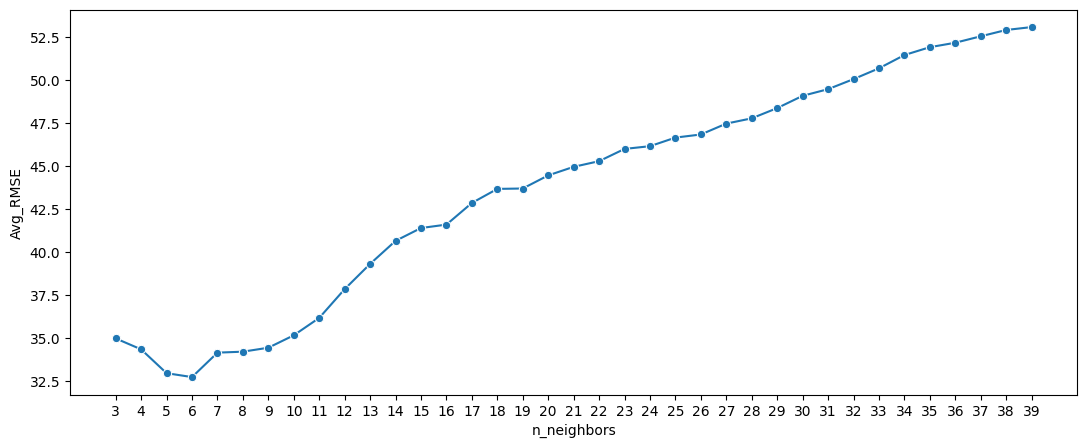

In [74]:
n_neighbors = [i for i in range(3, 40)]
RMSE = dict()
loo = LeaveOneOut()

for neighbor in n_neighbors:
    model = KNeighborsRegressor(weights="distance", n_neighbors=neighbor)
    RMSE[neighbor] = np.mean(np.abs(cross_val_score(estimator=model, X=X, y=Y, scoring="neg_root_mean_squared_error", cv=loo)))

knn_df = pd.DataFrame(RMSE.items(), columns=['n_neighbors', 'Avg_RMSE'])
plt.figure(figsize=(13,5))
plt.xticks(ticks=[i for i in range(min(n_neighbors), max(n_neighbors) + 1)])
sns.scatterplot(data=knn_df, x="n_neighbors", y="Avg_RMSE")
sns.lineplot(data=knn_df, x="n_neighbors", y="Avg_RMSE", marker="o")

In [76]:
result = pd.DataFrame({"Observed" : Y,
                       "Predicted" : grid_search.best_estimator_.predict(X),
                       "Error" : Y - grid_search.best_estimator_.predict(X)})
result.head(20)

,Observed,Predicted,Error
0,242.0,242.0,0.0
1,290.0,290.0,0.0
2,340.0,340.0,0.0
3,363.0,363.0,0.0
4,430.0,430.0,0.0
5,450.0,450.0,0.0
6,500.0,500.0,0.0
7,390.0,390.0,0.0
8,450.0,450.0,0.0
9,500.0,500.0,0.0


In [79]:
RMSE = np.sqrt(np.mean(result["Error"] ** 2))
RMSE

np.float64(2.803860770460221)

In [78]:
r2_score(Y, grid_search.best_estimator_.predict(X))

0.9999382638584063

### Support Vector Regressor

In [23]:
model = SVR()
param_grid = {"kernel" : ["linear", "poly", "rbf", "sigmoid"],
              "C" : [0.5, 1, 1.5, 0.1, 0.01, 2]}
loo = LeaveOneOut()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=loo, scoring="neg_root_mean_squared_error")
grid_search.fit(X, Y)
grid_search.best_estimator_

SVR(C=2, kernel='linear')

In [24]:
result = pd.DataFrame({"Observed" : Y,
                       "Predicted" : grid_search.best_estimator_.predict(X),
                       "Error" : Y - grid_search.best_estimator_.predict(X)})
result.head(20)

,Observed,Predicted,Error
0,242.0,343.382640,-101.382640
1,290.0,390.275444,-100.275444
2,340.0,399.823697,-59.823697
3,363.0,450.133690,-87.133690
4,430.0,469.015434,-39.015434
5,450.0,496.633078,-46.633078
6,500.0,515.164756,-15.164756
7,390.0,483.503379,-93.503379
8,450.0,512.076233,-62.076233
9,500.0,538.564256,-38.564256


In [25]:
RMSE = np.sqrt(np.mean(result["Error"] ** 2))
RMSE

np.float64(125.20674645938006)

In [26]:
r2_score(Y, grid_search.best_estimator_.predict(X))

0.8768931963477158